In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#Reset notebook style
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

import math
import numpy as np

from pykern.pkcollections import PKDict

import rslaser.rspulse.pulse as rsp
import rslaser.rspulse.gauss_hermite as rsgh
import rslaser.utils.plot_fields as rspf

In [2]:
# get some physical and mathematical constants ready to go
# this code snippet is adapted from rsbeams.rsphysics.rsconst.py
import math
import scipy.constants as const

TWO_PI = 2 * math.pi
RT_TWO_PI = math.sqrt(2*math.pi)
RT_2_OVER_PI = math.sqrt(2/math.pi)

c_SQ = const.c**2
c_INV  = 1./const.c
MKS_factor = 1./(4.*math.pi*const.epsilon_0)
m_e_EV = const.m_e * c_SQ / (-const.e)

In [3]:
# dimensionless laser pulse amplitude
# a_0 = 0.85e-9 * lambda [microns] * Sqrt(Intensity [W/cm^2])
# a_0 < 1 is low-amplitude, resulting in nonrelativistic plasma electron dynamics
# a_0 > 1 is high-amplitude, resulting in relativistic plasma electron dynamics
a0 = 2.1

# central laser wavelength [m]
lambda0 = 8.e-6

# FWHM pulse length
tau_fwhm = 200.e-9   # FWHM laser pulse length [s]

# waist size and its longitudinal location
w0 = 400.e-6     # [m]
z_waist = 0.1    # [m]
z_center = 0.0   # [m]

In [4]:
# create a dictionary of all relevant physical and numerical quantities
data_in=PKDict()

data_in.a0 = a0
data_in.w0 = w0
data_in.z_waist = z_waist
data_in.z_center = z_center
data_in.lambda0 = lambda0
data_in.tau_fwhm = tau_fwhm

#create laser pulse
laser_env = rsp.LaserPulseEnvelope(data_in)

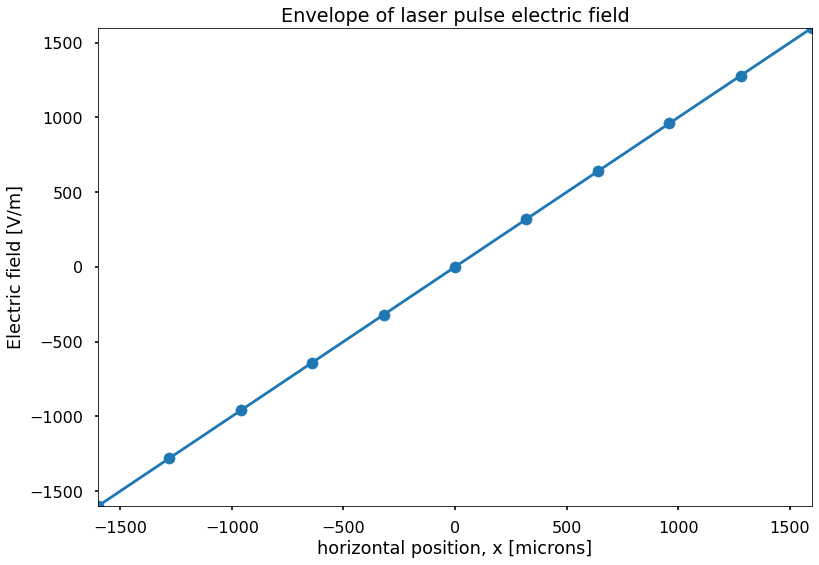

In [5]:
# Plot a transverse lineout of the electric field
n_points = 11
x_vals = np.zeros(n_points)
E_vals = np.zeros(n_points)

x_max = 4. * laser_env.w0*1.e6
x_min = -x_max
del_x = (x_max - x_min) / (n_points-1)
for ind in range(n_points):
    x_vals[ind] = x_min + ind*del_x
#    E_vals[ind] = laser_env.E_field(x_vals[ind], 0., 0.)
    E_vals[ind] = x_vals[ind]
#    print("x_vals(", ind, ") = ", x_vals[ind])

with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()

    ax.scatter(x_vals, E_vals)
    ax.plot(x_vals, E_vals)
    ax.set_xlabel('horizontal position, x [microns]')
    ax.set_ylabel('Electric field [V/m]')
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([np.min(E_vals), np.max(E_vals)])
    ax.set_title(r'Envelope of laser pulse electric field')

    #   plt.tight_layout()

In [6]:
# let's try again with a generalized GaussHermite envelope
# create a dictionary of all relevant physical and numerical quantities
data_in=PKDict()

data_in.a0 = a0
data_in.w0 = w0
data_in.lambda0 = lambda0
data_in.tau_fwhm = tau_fwhm

#create laser pulse
gh_env = rsgh.GaussHermite(data_in)

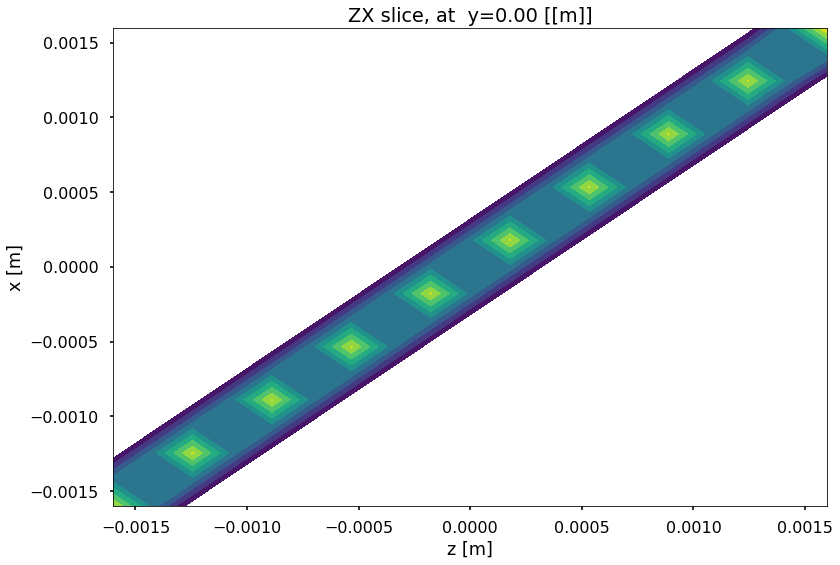

In [7]:
# plot fields in a z-x plane that intersects the y=0 axis
# we are assuming linear polarization along the x-axis
n_points = 101
x_vals = np.zeros(n_points)
z_vals = np.zeros(n_points)

x_max = 4. * laser_env.w0
x_min = -x_max
del_x = (x_max - x_min) / (n_points-1)

z_max = 4. * laser_env.w0
z_min = -z_max
del_z = (z_max - z_min) / (n_points-1)

for ind in range(n_points):
    x_vals[ind] = x_min + ind*del_x
    z_vals[ind] = z_min + ind*del_z

with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    rspf.plot_zx(z_vals, x_vals, gh_env, ax)

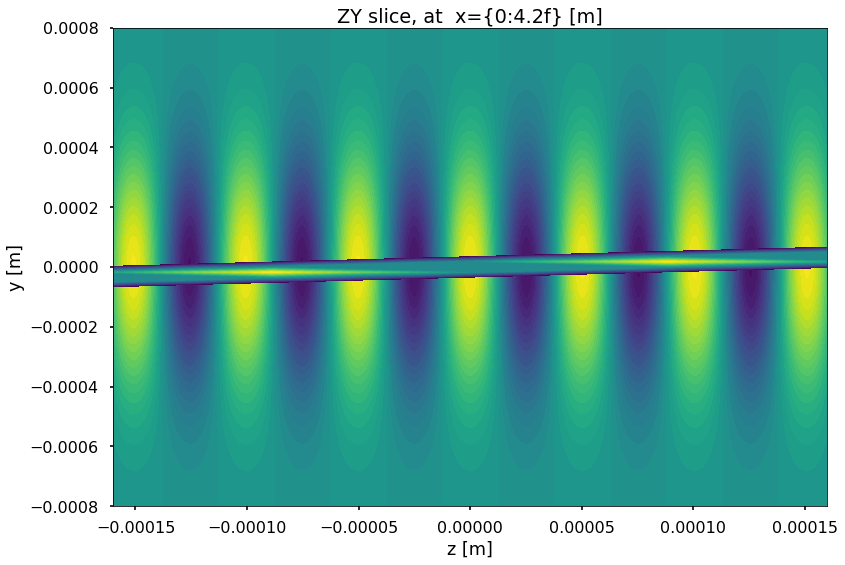

In [8]:
# plot fields in a z-y plane that intersects the x=0 axis
# we are assuming linear polarization along the x-axis
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    rspf.plot_zy(gh_env, ax) 

/home/vagrant/jupyter/repos/rslaser/rslaser/utils/plot_fields.py:127: ComplexWarning: Casting complex values to real discards the imaginary part
  xyEData[0:xyNumV, iLoop] = _pulse.evaluate_envelope_ex(xTmp, yArr, _z_waist)


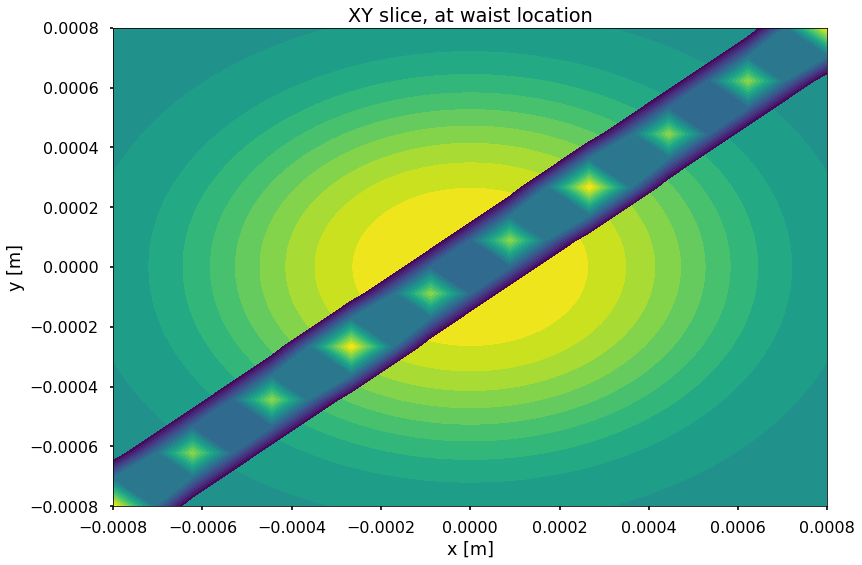

In [9]:
# plot fields in an x-y plane that intersects the z=0 axis
# we are assuming linear polarization along the x-axis
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    rspf.plot_xy(1000.*lambda0, gh_env, ax)